# Scientific Programming with Python - Final Project


## Submitter: Saar Pernik - 308491265


#### The classificaiton task is to determine whether a person makes over 50K a year based on demographic features.
***
age: continuous.
***
workclass: categorical
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
***
fnlwgt: continuous - estimated number of people this row represents.
***
education: categorical.
***
marital-status: categorical
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
***
occupation: categorical.
***
relationship: categorical
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
***
race: categorical
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
***
sex: boolean
Female, Male.
***
capital-gain: continuous.
Fiscal gain from selling assets.
***
capital-loss: continuous.
Fiscal loss from selling assets.
***
hours-per-week: continuous.
Number of hours worked per week.
***
native-country: categorical.
***

In [1]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install sklearn
!pip3 install scipy
!pip3 install pydotplus

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import pydotplus

# Intro

### The data set that I'm going to work on is a data set which show details on people and their income.

### We'll start with reading the data and watching the raw data without manipulations.

In [2]:
df = pd.read_csv('income2.csv')

In [3]:
df.tail(10)

,Index,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32551,32551,32,Private,34066,10th,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,NaN,0.0,40.0,United-States,<=50K
32552,32552,43,Private,84661,assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
32553,32553,32,Private,116138,masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,11.0,Taiwan,<=50K
32554,32554,53,Private,321865,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32555,32555,22,Private,310152,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
32556,32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,NaN,0.0,38.0,United-States,<=50K
32557,32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,NaN,0.0,40.0,United-States,>50K
32558,32558,58,NaN,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
32560,32560,52,Self-emp-inc,287927,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024.0,0.0,NaN,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           32561 non-null  int64  
 1   age             32561 non-null  int64  
 2   workclass       26136 non-null  object 
 3   fnlwgt          32561 non-null  int64  
 4   education       32561 non-null  object 
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             31844 non-null  object 
 10  capital-gain    25996 non-null  float64
 11  capital-loss    31791 non-null  float64
 12  hours-per-week  31776 non-null  float64
 13  native-country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe(include="all")

,Index,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,26136,3.256100e+04,32561,32561,32561,32561,32561,31844,25996.000000,31791.000000,31776.000000,32561,32561
unique,NaN,NaN,9,NaN,25,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,NaN,Private,NaN,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,NaN,18263,NaN,8441,14976,4140,13193,27816,21308,NaN,NaN,NaN,29170,24720
mean,16280.000000,38.581647,NaN,1.897784e+05,NaN,NaN,NaN,NaN,NaN,NaN,1076.333090,87.324369,40.445399,NaN,NaN
std,9399.695394,13.640433,NaN,1.055500e+05,NaN,NaN,NaN,NaN,NaN,NaN,7334.748763,402.809981,12.353038,NaN,NaN
min,0.000000,17.000000,NaN,1.228500e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,8140.000000,28.000000,NaN,1.178270e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,16280.000000,37.000000,NaN,1.783560e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,24420.000000,48.000000,NaN,2.370510e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### As we can see, the data set is containing 32561 rows and 15 features. Part of the features are categorial (Dtype = object) and some are numerical (Dtype = int64 / float64). We can notice that part of the data is NaN and that we have to handle it later.

# Initial Data Analysis

### Now, after we saw there are some NaN, I want to see the amount in each feature.

In [6]:
df.isnull().sum(axis=0)

Index                0
age                  0
workclass         6425
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship         0
race                 0
sex                717
capital-gain      6565
capital-loss       770
hours-per-week     785
native-country       0
income               0
dtype: int64

### I want take a look on "workclass" feature for example.

In [7]:
df["workclass"].value_counts()

 Private             18263
 Self-emp-not-inc     2028
 Local-gov            1665
 ?                    1473
 State-gov            1043
 Self-emp-inc          869
 Federal-gov           781
 Without-pay            10
 Never-worked            4
Name: workclass, dtype: int64

### Lets replace all "?" with NaN to handle all the unknown together.

In [8]:
df.isin([' ?']).sum(axis=0)

Index                0
age                  0
workclass         1473
fnlwgt               0
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [9]:
df = df.replace(' ?',np.nan)

In [10]:
df.isnull().sum(axis=1).value_counts()

0    18076
1    10453
2     3423
3      576
4       31
5        2
dtype: int64

### I want to drop all rows with more than 2 NaN features to be more accurate later. As many NaN fields I'll fill, I'll be less accurate later - if I have to fill more than 3 NaN in a specific row, it'll be better to drop this row.

In [11]:
df.dropna(thresh=13, inplace=True)

In [12]:
df.isnull().sum(axis=1).value_counts()

0    18076
1    10453
2     3423
dtype: int64

In [13]:
df.isnull().sum(axis=0)

Index                0
age                  0
workclass         7301
fnlwgt               0
education            0
marital-status       0
occupation        1374
relationship         0
race                 0
sex                629
capital-gain      6094
capital-loss       696
hours-per-week     694
native-country     511
income               0
dtype: int64

### As we saw on the describe, we can fill the 3  numerical fields with mean. Below we can see the destribution of each feature among it's values - most of them are on specific value.

In [14]:
df["capital-gain"].value_counts()

0.0        23686
15024.0      289
7688.0       229
7298.0       210
99999.0      124
           ...  
7978.0         1
3456.0         1
4931.0         1
1424.0         1
6097.0         1
Name: capital-gain, Length: 117, dtype: int64

In [15]:
df["capital-loss"].value_counts()

0.0       29796
1902.0      199
1977.0      164
1887.0      153
1848.0       51
          ...  
155.0         1
2282.0        1
2080.0        1
1844.0        1
2467.0        1
Name: capital-loss, Length: 91, dtype: int64

In [16]:
df["hours-per-week"].describe()

count    31258.000000
mean        40.561488
std         12.278920
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [17]:
df["hours-per-week"].fillna(df["hours-per-week"].mean(), inplace=True)
df["capital-loss"].fillna(df["capital-loss"].mean(), inplace=True)
df["capital-gain"].fillna(df["capital-gain"].mean(), inplace=True)
df["net-gain"]=df["capital-gain"]-df["capital-loss"]

In [18]:
df["net-gain"].value_counts()

 0.000000        21979
 1076.017789      5702
-87.269996         527
 15024.000000      281
 7688.000000       224
                 ...  
-1205.982211         1
 1760.730004         1
 1063.730004         1
 6723.000000         1
-1526.982211         1
Name: net-gain, Length: 293, dtype: int64

In [19]:
df["net-gain"].describe()

count    31952.000000
mean       988.747793
std       6614.548777
min      -4356.000000
25%          0.000000
50%          0.000000
75%        114.000000
max      99999.000000
Name: net-gain, dtype: float64

In [20]:
df.isnull().sum(axis=0)

Index                0
age                  0
workclass         7301
fnlwgt               0
education            0
marital-status       0
occupation        1374
relationship         0
race                 0
sex                629
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     511
income               0
net-gain             0
dtype: int64

### Now, I want to take a look at each feature to understand if it'll be helpful later or not

In [21]:
df["age"].value_counts()

36    883
34    873
31    873
35    869
33    864
     ... 
83      6
88      3
85      3
87      1
86      1
Name: age, Length: 73, dtype: int64

#### It seems there are many values, I want to add aggregation as age_range for later.

In [22]:
df['age_range'] = pd.cut(df['age'], bins = [0, 24, 39, 60,100], labels = ['0-24', '25-39', '40-60','60 plus'])
df['age_range'] = df['age_range'].replace({'0-24':1, '25-39':2, '40-60':3,'60 plus':4})

In [23]:
df["workclass"].value_counts()

 Private             18255
 Self-emp-not-inc     2028
 Local-gov            1663
 State-gov            1043
 Self-emp-inc          867
 Federal-gov           781
 Without-pay            10
 Never-worked            4
Name: workclass, dtype: int64

#### It seems there most common value is "Private", I'll fill all NaN with the that.

In [24]:
df['workclass'] = df['workclass'].fillna(' Private')

In [25]:
df.nunique()

Index             31952
age                  73
workclass             8
fnlwgt            21289
education            25
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        118
capital-loss         92
hours-per-week       95
native-country       41
income                2
net-gain            293
age_range             4
dtype: int64

In [26]:
df["fnlwgt"].describe()

count    3.195200e+04
mean     1.898605e+05
std      1.056305e+05
min      1.228500e+04
25%      1.177890e+05
50%      1.784250e+05
75%      2.373170e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

#### "fnlwgt" and "Index" have too many values that seem to be useless to our purpose, so I'll drop them.

In [27]:
df=df.drop(["fnlwgt","Index"], axis=1)

In [28]:
df["education"].value_counts()

 HS-grad         8314
 Some-college    5754
 Bachelors       4270
 hs-grad         2023
 Masters         1384
 some-college    1366
 11th            1142
 Assoc-voc       1090
 bachelors       1019
 10th             908
 Assoc-acdm       843
 7th-8th          622
 9th              493
 Prof-school      461
 12th             421
 Doctorate        334
 5th-6th          324
 masters          318
 assoc-voc        269
 assoc-acdm       205
 1st-4th          163
 prof-school      106
 doctorate         73
 Preschool         39
 preschool         11
Name: education, dtype: int64

#### There are the 2 values for the same education that the difference is a capital letter so I'll manipulate this feature and aggregate all pre-school together with 1st-10th as "Basic-education".

In [29]:
df["education"] = df["education"].str.replace(' ', '')

In [30]:
df['education'] = df['education'].replace({'hs-grad':'HS-grad',
                                           "some-college":"Some-college",
                                           "11th":"Basic-education",
                                           "10th":"Basic-education",
                                           "7th-8th":"Basic-education",
                                           "9th":"Basic-education",
                                           "12th":"Basic-education",
                                           "1st-4th":"Basic-education",
                                           "5th-6th":"Basic-education",
                                           "preschool":"Basic-education",
                                           "Preschool":"Basic-education",
                                           "prof-school":"Prof-school",
                                           "masters":"Masters",
                                           "assoc-voc":"Assoc-voc",
                                           "bachelors":"Bachelors",
                                           "doctorate":"Doctorate",
                                           "assoc-acdm":"Assoc-acdm",})

In [31]:
df["education"].value_counts()

HS-grad            10337
Some-college        7120
Bachelors           5289
Basic-education     4123
Masters             1702
Assoc-voc           1359
Assoc-acdm          1048
Prof-school          567
Doctorate            407
Name: education, dtype: int64

In [32]:
df["marital-status"].value_counts()

 Married-civ-spouse       14752
 Never-married            10437
 Divorced                  4382
 Separated                 1005
 Widowed                    944
 Married-spouse-absent      409
 Married-AF-spouse           23
Name: marital-status, dtype: int64

#### I want to aggregate the marital status into 3 "statuses".

In [33]:
df["marital-status"] = df["marital-status"].str.replace(' ', '')

In [34]:
df['marital-status'] = df['marital-status'].replace({'Married-civ-spouse':'Married',
                                           "Married-spouse-absent":"Married",
                                           "Married-AF-spouse":"Married",
                                           "Divorced":"Other",
                                           "Separated":"Other",
                                           "Widowed":"Other"})

In [35]:
df["marital-status"].value_counts()

Married          15184
Never-married    10437
Other             6331
Name: marital-status, dtype: int64

In [36]:
df["occupation"].value_counts()

 Prof-specialty       4117
 Craft-repair         4084
 Exec-managerial      4041
 Adm-clerical         3752
 Sales                3631
 Other-service        3279
 Machine-op-inspct    1996
 Transport-moving     1591
 Handlers-cleaners    1364
 Farming-fishing       989
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       148
 Armed-Forces            9
Name: occupation, dtype: int64

In [37]:
df["occupation"].isnull().sum()/df["occupation"].count()*100

4.493426646608674

In [38]:
# Low percentage of the data
# df.dropna(subset=['occupation'],inplace=True)
df['occupation'] = df['occupation'].fillna(' Prof-specialty')

In [39]:
df["race"].value_counts()

 White                 27325
 Black                  3055
 Asian-Pac-Islander     1006
 Amer-Indian-Eskimo      304
 Other                   262
Name: race, dtype: int64

In [40]:
df["sex"].value_counts()

 Male      21022
 Female    10301
Name: sex, dtype: int64

In [41]:
df["sex"].isnull().sum()/df["sex"].count()*100

2.008109057242282

In [42]:
# Low percentage of the data
# df.dropna(subset=['sex'],inplace=True)
df['sex'] = df['sex'].fillna(' Male')

In [43]:
df["relationship"].value_counts()

 Husband           13013
 Not-in-family      8169
 Own-child          4901
 Unmarried          3385
 Wife               1526
 Other-relative      958
Name: relationship, dtype: int64

In [44]:
df=df.drop(["relationship"], axis=1)

In [45]:
df["native-country"].value_counts()

 United-States                 28673
 Mexico                          632
 Philippines                     193
 Germany                         136
 Canada                          118
 Puerto-Rico                     114
 El-Salvador                     104
 India                           100
 Cuba                             95
 England                          89
 Jamaica                          81
 South                            77
 China                            74
 Italy                            72
 Dominican-Republic               69
 Vietnam                          67
 Guatemala                        63
 Japan                            61
 Poland                           59
 Columbia                         57
 Taiwan                           49
 Iran                             43
 Haiti                            43
 Portugal                         36
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [46]:
df["native-country"].isnull().sum()/df["native-country"].count()*100

1.6252663719347349

In [47]:
# Low percentage of the data
# df.dropna(subset=['native-country'],inplace=True)
df['native-country'] = df['native-country'].fillna(' United-States')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31952 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31952 non-null  int64  
 1   workclass       31952 non-null  object 
 2   education       31952 non-null  object 
 3   marital-status  31952 non-null  object 
 4   occupation      31952 non-null  object 
 5   race            31952 non-null  object 
 6   sex             31952 non-null  object 
 7   capital-gain    31952 non-null  float64
 8   capital-loss    31952 non-null  float64
 9   hours-per-week  31952 non-null  float64
 10  native-country  31952 non-null  object 
 11  income          31952 non-null  object 
 12  net-gain        31952 non-null  float64
 13  age_range       31952 non-null  int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 3.7+ MB


In [49]:
df.to_csv('income2_clean.csv')

In [50]:
31952/32561*100

98.12966432234882

### We cleaned the data according to statistics and remove 2 features that won't help in the next steps because of their scattering. we left with 31952 of the rows which are 98.12% of the data.

# Exploratory Data Analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

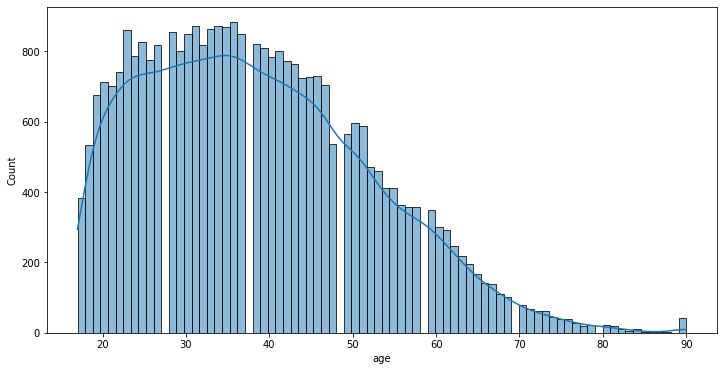

In [51]:
fig=plt.figure(figsize=(12, 6))
sns.histplot(df.age, bins=80, kde=True,)

<AxesSubplot:xlabel='income', ylabel='Count'>

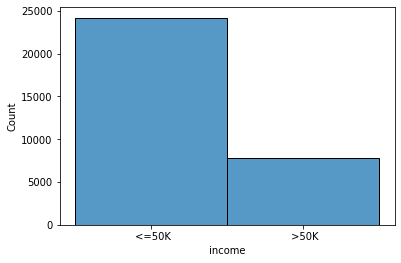

In [52]:
sns.histplot(df.income, bins=80)

<AxesSubplot:xlabel='sex', ylabel='Count'>

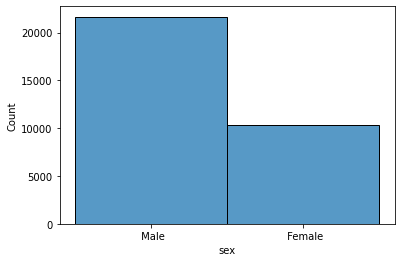

In [53]:
sns.histplot(df.sex, bins=80)

<AxesSubplot:xlabel='sex', ylabel='count'>

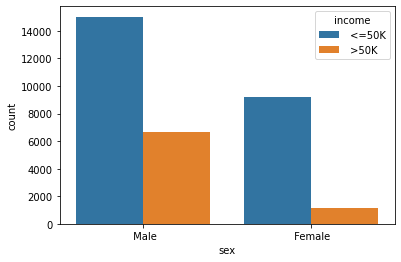

In [54]:
sns.countplot(x='sex',hue='income',data=df)


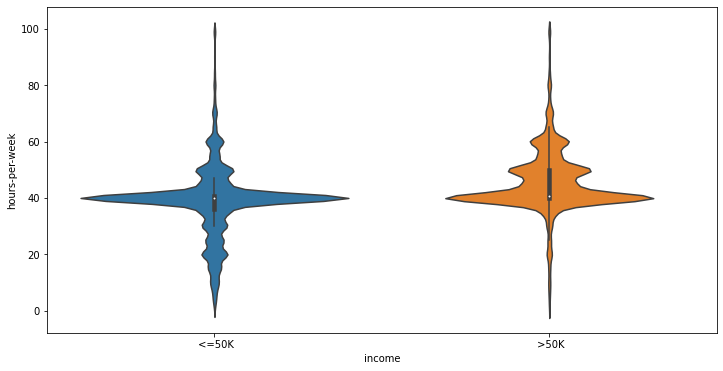

In [55]:
fig=plt.figure(figsize=(12, 6))
sns.violinplot(x="income", y="hours-per-week", data=df);

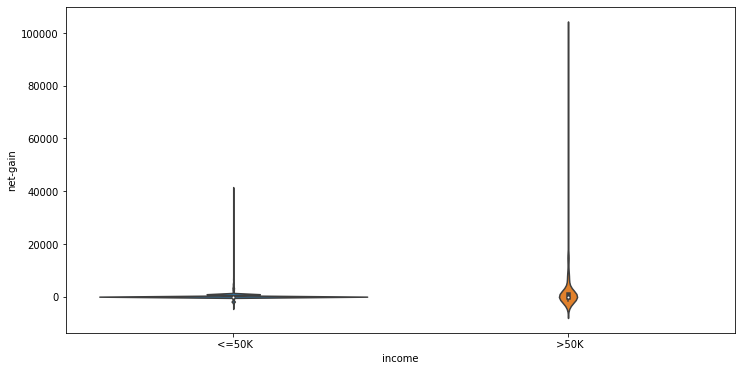

In [56]:
fig=plt.figure(figsize=(12, 6))
sns.violinplot(x="income", y="net-gain", data=df);

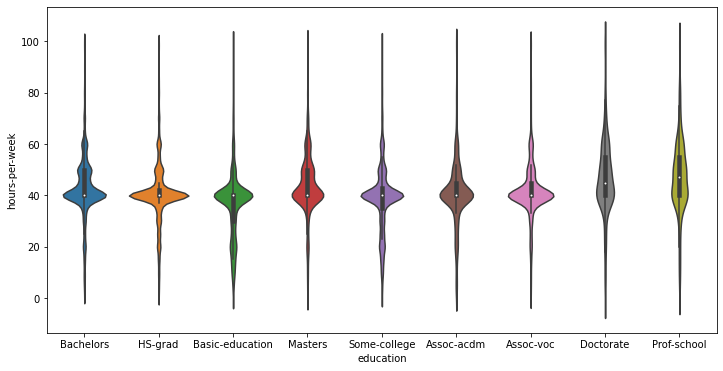

In [57]:
fig=plt.figure(figsize=(12, 6))
sns.violinplot(x="education", y="hours-per-week", data=df);

<AxesSubplot:xlabel='education', ylabel='count'>

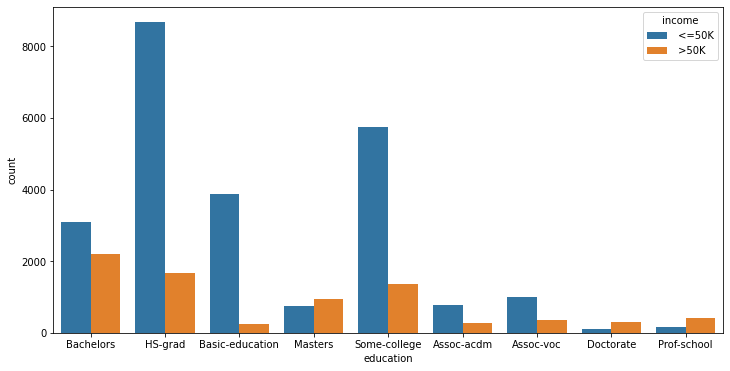

In [58]:
fig=plt.figure(figsize=(12, 6))
sns.countplot(x='education',hue='income',data=df)

<AxesSubplot:xlabel='workclass', ylabel='count'>

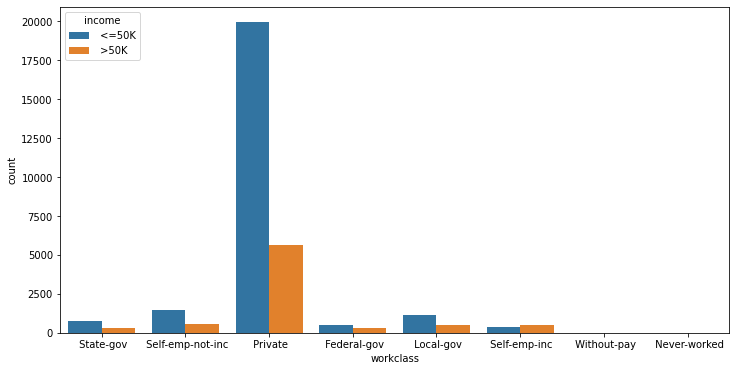

In [59]:
fig=plt.figure(figsize=(12, 6))
sns.countplot(x='workclass',hue='income',data=df)

<AxesSubplot:xlabel='race', ylabel='count'>

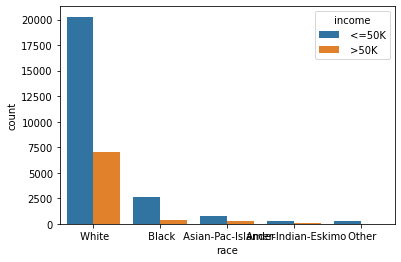

In [60]:
sns.countplot(x='race',hue='income',data=df)

In [61]:
df['age_range'] = pd.cut(df['age'], bins = [0, 24, 39, 60,100], labels = ['0-24', '25-39', '40-60','60 plus'])
df['age_range'] = df['age_range'].replace({'0-24':1, '25-39':2, '40-60':3,'60 plus':4})

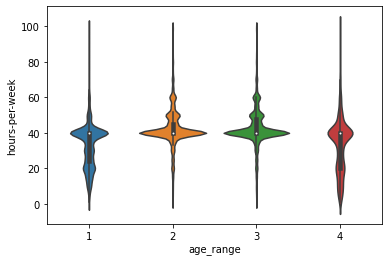

In [62]:
sns.violinplot(x="age_range", y="hours-per-week", data=df);

In [63]:
categorical =df.select_dtypes(include=['object'])
numerical = df.select_dtypes(exclude=['object'])
encoder = LabelEncoder()
categorical = categorical.apply(encoder.fit_transform)
df = pd.concat([numerical, categorical], axis=1)
df.head()


,age,capital-gain,capital-loss,hours-per-week,net-gain,age_range,workclass,education,marital-status,occupation,race,sex,native-country,income
0,39,1076.017789,0.000000,40.0,1076.017789,2,6,2,1,0,4,1,38,0
1,50,0.000000,0.000000,13.0,0.000000,3,5,2,0,3,4,1,38,0
2,38,0.000000,87.269996,40.0,-87.269996,2,3,5,2,5,4,1,38,0
3,53,0.000000,0.000000,40.0,0.000000,3,3,3,0,5,2,1,38,0
4,28,0.000000,0.000000,40.0,0.000000,2,3,2,0,9,2,0,4,0


<AxesSubplot:>

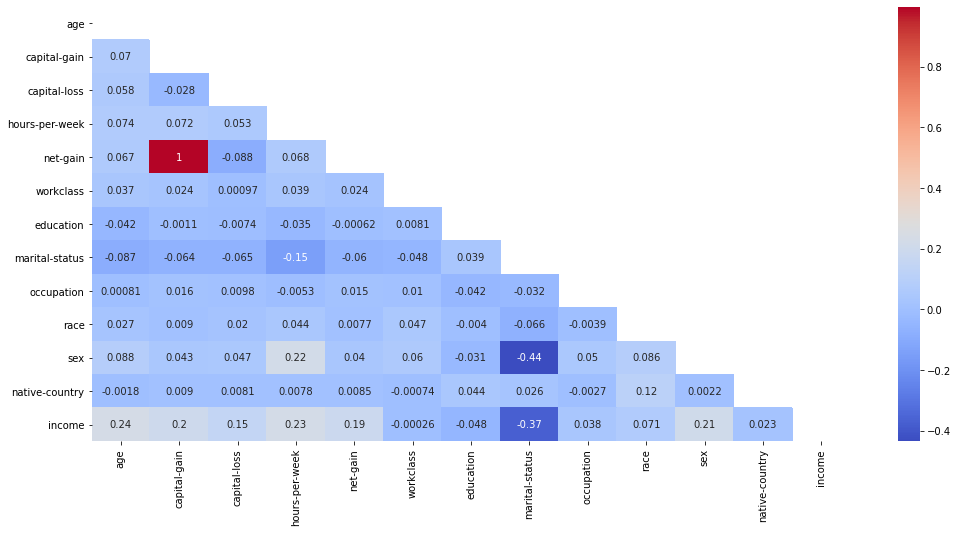

In [64]:
fig = plt.figure(figsize=(17,8))

correlations = df.drop(["age_range","net-gain"],axis=1).corr()
matrix = np.triu(correlations.corr())
sns.heatmap(correlations, annot= True,  mask=matrix, cmap='coolwarm')

# Classification Model

## 1. Gaussian Naïve Bayes

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31952 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31952 non-null  int64  
 1   capital-gain    31952 non-null  float64
 2   capital-loss    31952 non-null  float64
 3   hours-per-week  31952 non-null  float64
 4   net-gain        31952 non-null  float64
 5   age_range       31952 non-null  int64  
 6   workclass       31952 non-null  int64  
 7   education       31952 non-null  int64  
 8   marital-status  31952 non-null  int64  
 9   occupation      31952 non-null  int64  
 10  race            31952 non-null  int64  
 11  sex             31952 non-null  int64  
 12  native-country  31952 non-null  int64  
 13  income          31952 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 4.9 MB


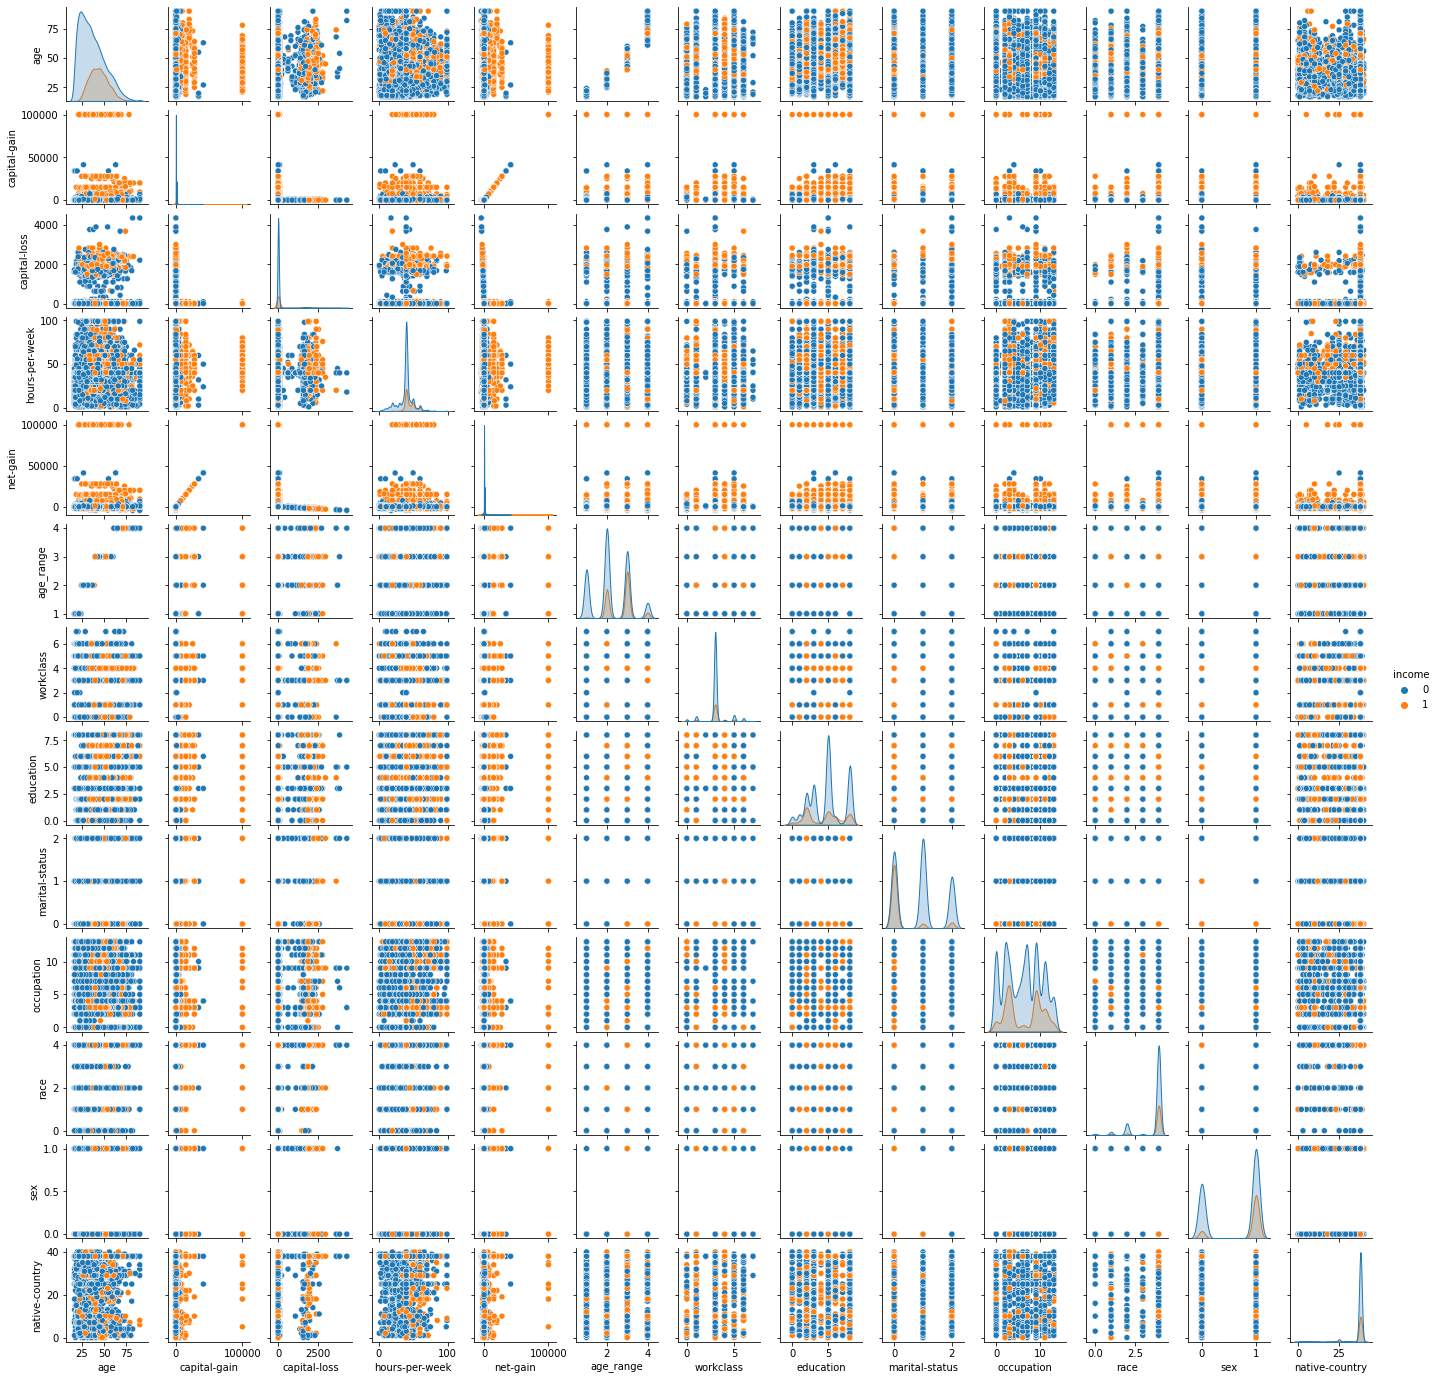

In [66]:
sns.pairplot(df, hue='income', height=1.5);

In [67]:
X_df = df.drop(['income','age_range'], axis=1)
print(X_df.shape)
Y_df = df['income']
print(Y_df.shape)
def GaussianBayes(X_df,Y_df):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_df, Y_df,test_size=0.2,random_state=1)
    model = GaussianNB()
    model.fit(Xtrain, Ytrain)
    Y_model = model.predict(Xtest)

    Ypred = pd.Series(Y_model,name="prediction")
    predicted = pd.concat([Xtest.reset_index(),Ytest.reset_index(),Ypred],axis=1)
    print(predicted)
    print("Accuracy:", metrics.accuracy_score(Ytest, Y_model))
    print(metrics.classification_report(Ytest, Ypred))
GaussianBayes(X_df,Y_df)

(31952, 12)
(31952,)
      index  age  capital-gain  capital-loss  hours-per-week  net-gain  \
0     29548   50           0.0           0.0            45.0       0.0   
1     25935   30           0.0           0.0            60.0       0.0   
2     17798   26           0.0           0.0            40.0       0.0   
3     12219   58        2174.0           0.0            40.0    2174.0   
4      9822   25           0.0           0.0            42.0       0.0   
...     ...  ...           ...           ...             ...       ...   
6386  12720   62           0.0           0.0            48.0       0.0   
6387    912   53           0.0           0.0            60.0       0.0   
6388   2898   29           0.0           0.0            40.0       0.0   
6389  29310   22           0.0           0.0            40.0       0.0   
6390   2097   56           0.0           0.0            46.0       0.0   

      workclass  education  marital-status  occupation  race  sex  \
0             3      

In [68]:
X_df = df[["age","capital-gain"]]
GaussianBayes(X_df,Y_df)

      index  age  net-gain  index  income  prediction
0     29548   50       0.0  29548       1           0
1     25935   30       0.0  25935       0           0
2     17798   26       0.0  17798       0           0
3     12219   58    2174.0  12219       0           0
4      9822   25       0.0   9822       1           0
...     ...  ...       ...    ...     ...         ...
6386  12720   62       0.0  12720       0           0
6387    912   53       0.0    912       0           0
6388   2898   29       0.0   2898       0           0
6389  29310   22       0.0  29310       0           0
6390   2097   56       0.0   2097       0           0

[6391 rows x 6 columns]
Accuracy: 0.778907839148803
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4797
           1       0.75      0.17      0.28      1594

    accuracy                           0.78      6391
   macro avg       0.76      0.58      0.57      6391
weighted avg       0.77    

In [69]:
X_df = df[["hours-per-week","capital-gain"]]
GaussianBayes(X_df,Y_df)

      index  hours-per-week  capital-gain  index  income  prediction
0     29548            45.0           0.0  29548       1           0
1     25935            60.0           0.0  25935       0           0
2     17798            40.0           0.0  17798       0           0
3     12219            40.0        2174.0  12219       0           0
4      9822            42.0           0.0   9822       1           0
...     ...             ...           ...    ...     ...         ...
6386  12720            48.0           0.0  12720       0           0
6387    912            60.0           0.0    912       0           0
6388   2898            40.0           0.0   2898       0           0
6389  29310            40.0           0.0  29310       0           0
6390   2097            46.0           0.0   2097       0           0

[6391 rows x 6 columns]
Accuracy: 0.778751369112815
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4797
          

In [93]:
X_df = df[["age","net-gain"]]
GaussianBayes(X_df,Y_df)

      index  age  net-gain  index  income  prediction
0     29548   50       0.0  29548       1           0
1     25935   30       0.0  25935       0           0
2     17798   26       0.0  17798       0           0
3     12219   58    2174.0  12219       0           0
4      9822   25       0.0   9822       1           0
...     ...  ...       ...    ...     ...         ...
6386  12720   62       0.0  12720       0           0
6387    912   53       0.0    912       0           0
6388   2898   29       0.0   2898       0           0
6389  29310   22       0.0  29310       0           0
6390   2097   56       0.0   2097       0           0

[6391 rows x 6 columns]
Accuracy: 0.778907839148803
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4797
           1       0.75      0.17      0.28      1594

    accuracy                           0.78      6391
   macro avg       0.76      0.58      0.57      6391
weighted avg       0.77    

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4797
           1       0.75      0.17      0.28      1594

    accuracy                           0.78      6391
   macro avg       0.76      0.58      0.57      6391
weighted avg       0.77      0.78      0.72      6391



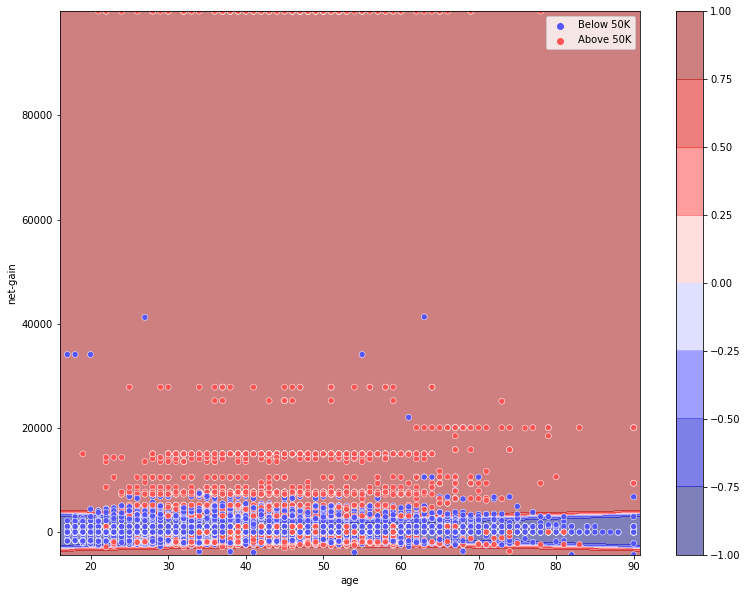

In [72]:
def bayes_plot(df,model="gnb",spread=30):
    
    colors = 'seismic'
    col1 = df.columns[0]
    income = ["Below 50K","Above 50K"]
    col2 = df.columns[1]
    target = df.columns[2]

    y = df[target] 
    X = df.drop(target, axis=1)

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(Xtrain, Ytrain)

    prob = len(clf.classes_) == 2

    print(metrics.classification_report(Ytest, Ypred))

    hueorder = clf.classes_
    
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:
        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    plot = sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    legends=plt.legend()
    for i, val in enumerate(income):
            legends.get_texts()[i].set_text(val)
    fig.set_size_inches(13, 10)
    plt.show()
bayes_plot(pd.concat([X_df,Y_df],axis=1),spread=1)

# 2. Decision Tree

## Create a decision tree classifier based on your manipulated data set, selecting the most relevant features. Show your final decision tree classification report and model visualization. Did you manage to improve the performance?

In [91]:
X_df = df[["age","net-gain"]]
print(X_df.shape)
Y_df = df['income']
print(Y_df.shape)
def DecisionTree(X_df,Y_df):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_df, Y_df,test_size=0.2,random_state=1)
    model = DecisionTreeClassifier()
    model.fit(Xtrain, Ytrain)
    Y_model = model.predict(Xtest)

    Ypred = pd.Series(Y_model,name="prediction")
    predicted = pd.concat([Xtest.reset_index(),Ytest.reset_index(),Ypred],axis=1)
    print(predicted)
    print("Accuracy:", metrics.accuracy_score(Ytest, Y_model))
    print(metrics.classification_report(Ytest, Ypred))


(31952, 2)
(31952,)


In [92]:
DecisionTree(X_df,Y_df)

      index  age  net-gain  index  income  prediction
0     29548   50       0.0  29548       1           0
1     25935   30       0.0  25935       0           0
2     17798   26       0.0  17798       0           0
3     12219   58    2174.0  12219       0           0
4      9822   25       0.0   9822       1           0
...     ...  ...       ...    ...     ...         ...
6386  12720   62       0.0  12720       0           0
6387    912   53       0.0    912       0           0
6388   2898   29       0.0   2898       0           0
6389  29310   22       0.0  29310       0           0
6390   2097   56       0.0   2097       0           0

[6391 rows x 6 columns]
Accuracy: 0.8075418557346268
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      4797
           1       0.92      0.25      0.39      1594

    accuracy                           0.81      6391
   macro avg       0.86      0.62      0.64      6391
weighted avg       0.83   

## Show a baseline decision tree classification report for your dataset. A baseline classification is one where all features were used, all rows containing NA values were dropped.

In [85]:
df_raw = pd.read_csv('income2.csv')

In [86]:
df_raw.dropna(inplace=True)

In [87]:
categorical =df_raw.select_dtypes(include=['object'])
numerical = df_raw.select_dtypes(exclude=['object'])
encoder = LabelEncoder()
categorical = categorical.apply(encoder.fit_transform)
df_raw = pd.concat([numerical, categorical], axis=1)
df_raw.head()

,Index,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
1,1,50,83311,0.0,0.0,13.0,5,18,2,4,0,4,1,39,0
3,3,53,234721,0.0,0.0,40.0,3,1,2,6,0,2,1,39,0
6,6,49,160187,0.0,0.0,16.0,3,6,3,8,1,2,0,23,0
7,7,52,209642,0.0,0.0,45.0,5,11,2,4,0,4,1,39,1
8,8,31,45781,14084.0,0.0,50.0,3,12,4,10,1,4,0,39,1


In [88]:
X_df = df_raw.drop(["income"],axis=1)
print(X_df.shape)
Y_df = df_raw['income']
print(Y_df.shape)
DecisionTree(X_df,Y_df)

(19513, 14)
(19513,)
      index  Index  age  fnlwgt  capital-gain  capital-loss  hours-per-week  \
0     30321  30321   24  174043           0.0           0.0            40.0   
1      7740   7740   30  186420           0.0           0.0            40.0   
2     28753  28753   20  204226           0.0           0.0            40.0   
3     12837  12837   69  203072           0.0           0.0            50.0   
4     15203  15203   27  207213           0.0           0.0            40.0   
...     ...    ...  ...     ...           ...           ...             ...   
3898   9369   9369   36  137527           0.0           0.0            50.0   
3899  28146  28146   40   30759           0.0           0.0            60.0   
3900  20984  20984   47  284871           0.0        1887.0            40.0   
3901  17330  17330   47  102308       99999.0           0.0            50.0   
3902  32305  32305   34  356882           0.0           0.0            45.0   

      workclass  education  ma

### Summary

##### As we saw, we managed to predict with 80% accuracy using decision tree and  78% using Naïve Bayes - with just 2 features .
##### The data contained a lot of Nan values and a lot of noise. The most difficult work was on manipulating the data in order to fill the missing values with no impact on the reliability of the data.